In [35]:
## Insurance Premium Prediction

In [36]:
import pandas as pd
import numpy as np
import statsmodels
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('/config/workspace/insurance.csv')

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [39]:
df.shape

(1338, 7)

In [40]:
df.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [41]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [42]:
df.describe(include="O")


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## ***EDA and Visualization***

In [49]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### ***AGE***

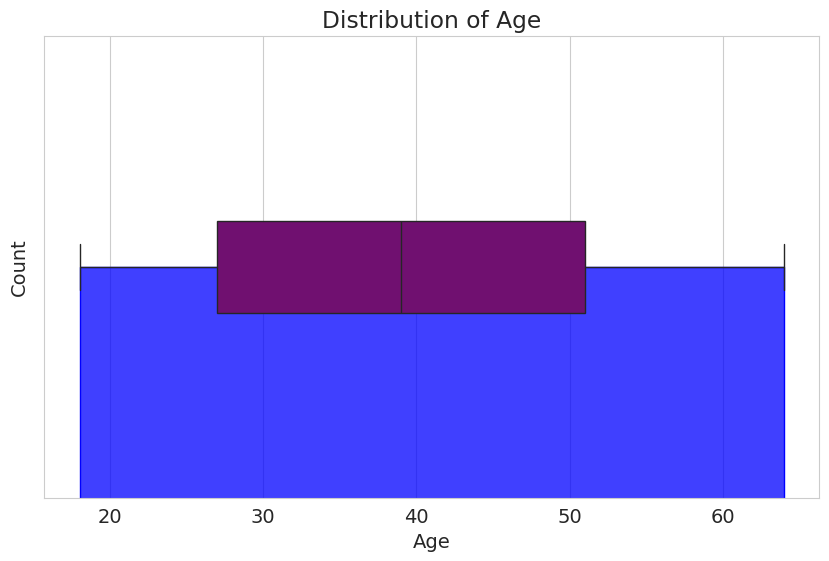

In [50]:
# Set the style
sns.set_style("whitegrid")

# Create the histogram with a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=47, element="step", common_norm=False, color="blue")
sns.boxplot(data=df, x='age', color="purple", width=0.2)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()


### ***BODY MASS INDEX***

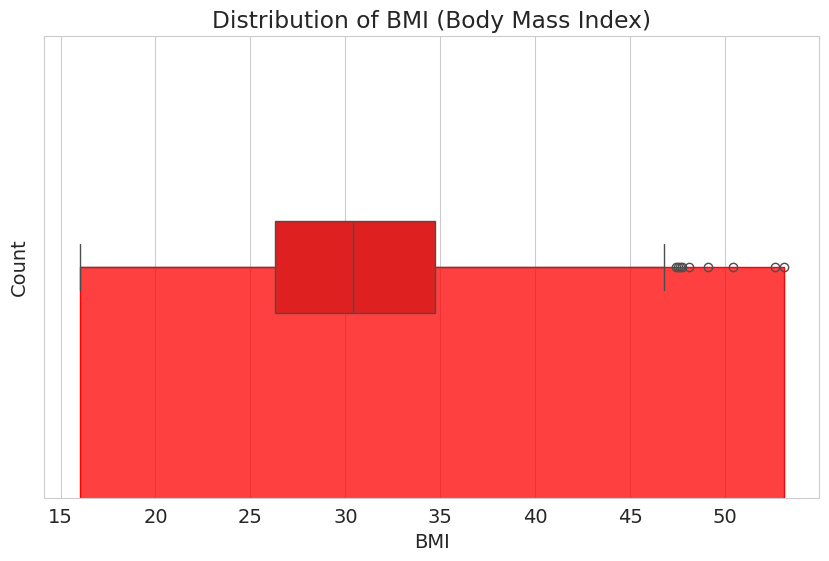

In [54]:
# Set the style and color
sns.set_style("whitegrid")
color = "red"

# Create the histogram with a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', element="step", common_norm=False, color=color)
sns.boxplot(data=df, x='bmi', color=color, width=0.2)
plt.title('Distribution of BMI (Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('Count')

# Show the plot
plt.show()


### ***Expenses***

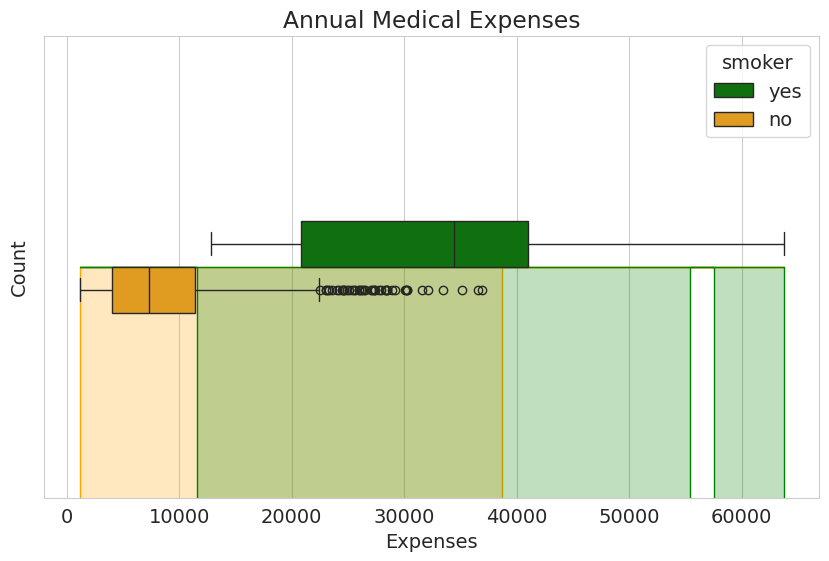

In [55]:
# Set the style and color palette
sns.set_style("whitegrid")
colors = ["green", "orange"]

# Create the histogram with box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='expenses', hue='smoker', element="step", common_norm=False, palette=colors)
sns.boxplot(data=df, x='expenses', hue='smoker', palette=colors, width=0.2)
plt.title("Annual Medical Expenses")
plt.xlabel("Expenses")
plt.ylabel("Count")

# Show the plot
plt.show()


### ***Charges & Gender***

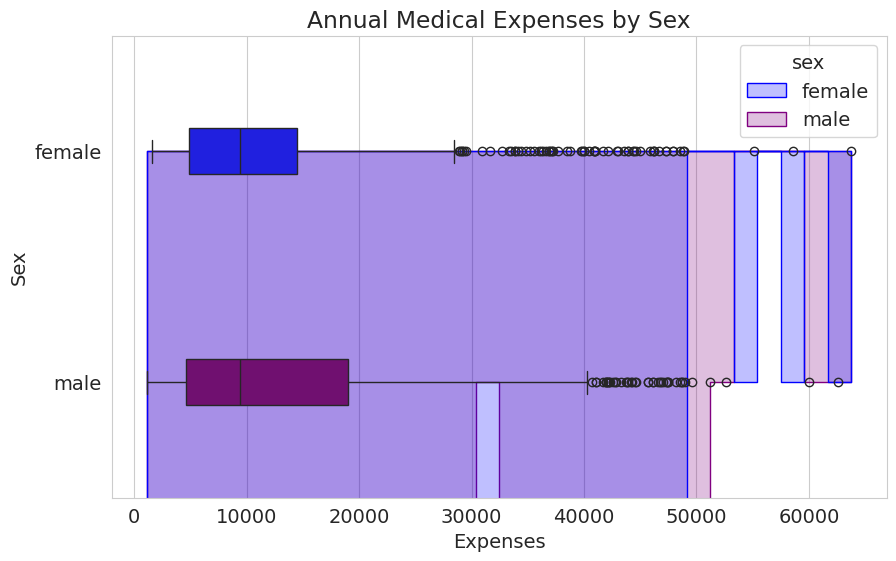

In [56]:
# Set the style and custom colors
sns.set_style("whitegrid")
colors = ["blue", "purple"]

# Create the histogram with box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="expenses", hue="sex", element="step", common_norm=False, palette=colors)
sns.boxplot(data=df, x="expenses", y="sex", palette=colors, width=0.2)
plt.title("Annual Medical Expenses by Sex")
plt.xlabel("Expenses")
plt.ylabel("Sex")

# Show the plot
plt.show()


### ***Distribution of expenses with Region***

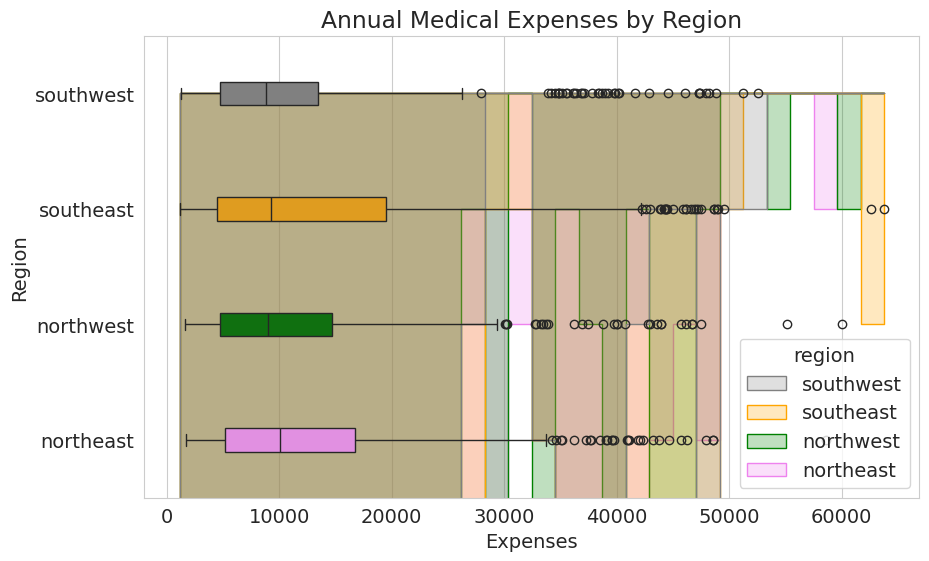

In [57]:
# Set the style and custom colors
sns.set_style("whitegrid")
colors = ["grey", "orange", "green", "violet"]

# Create the histogram with box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="expenses", hue="region", element="step", common_norm=False, palette=colors)
sns.boxplot(data=df, x="expenses", y="region", palette=colors, width=0.2)
plt.title("Annual Medical Expenses by Region")
plt.xlabel("Expenses")
plt.ylabel("Region")

# Show the plot
plt.show()


### ***Smoker***

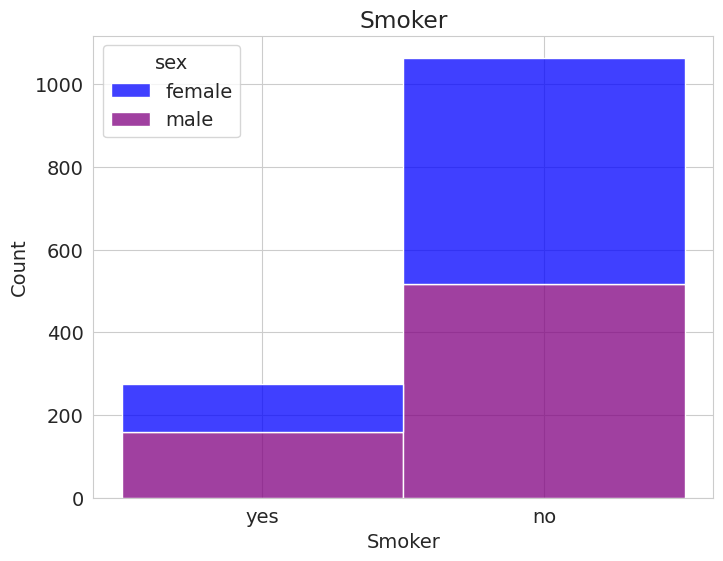

In [58]:
# Set the style and custom colors
sns.set_style("whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="smoker", hue="sex", multiple="stack", palette=["blue", "purple"])
plt.title("Smoker")
plt.xlabel("Smoker")
plt.ylabel("Count")

# Show the plot
plt.show()


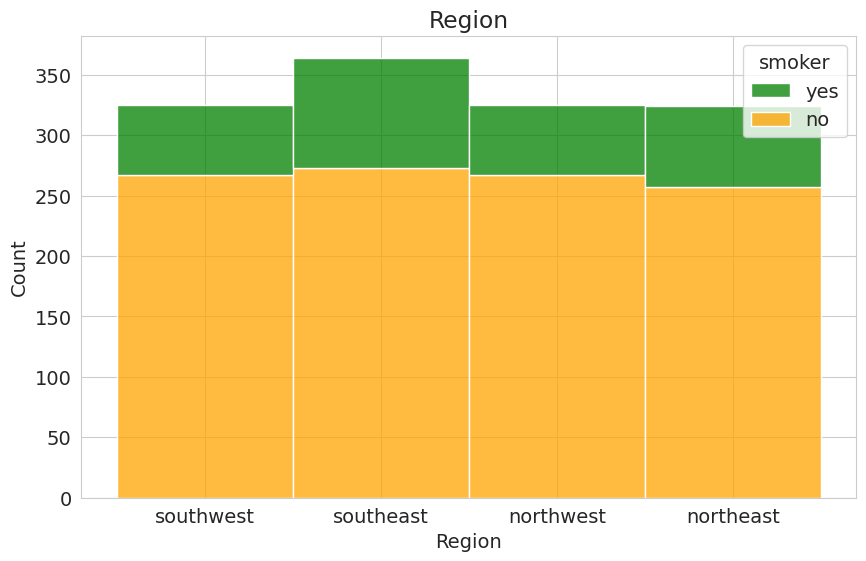

In [59]:
# Set the style and custom colors
sns.set_style("whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="region", hue="smoker", multiple="stack", palette=["green", "orange"])
plt.title("Region")
plt.xlabel("Region")
plt.ylabel("Count")

# Show the plot
plt.show()


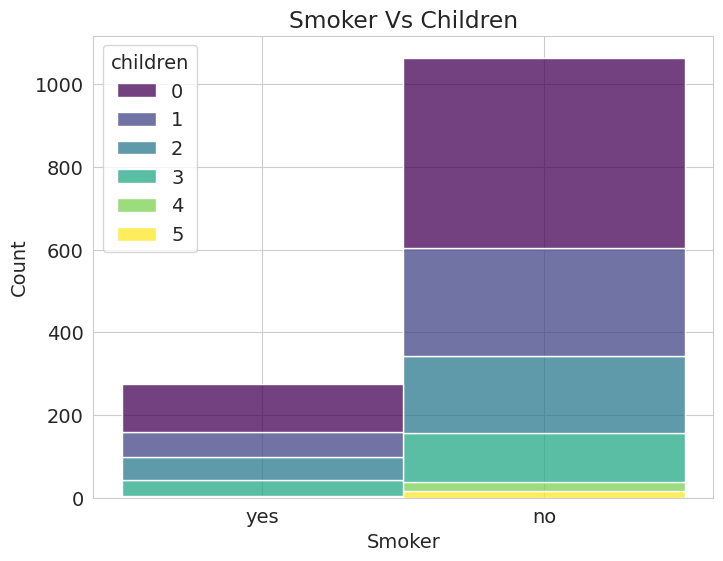

In [60]:
# Set the style and custom colors
sns.set_style("whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="smoker", hue="children", multiple="stack", palette="viridis")
plt.title("Smoker Vs Children")
plt.xlabel("Smoker")
plt.ylabel("Count")

# Show the plot
plt.show()


### ***Age & Charges***

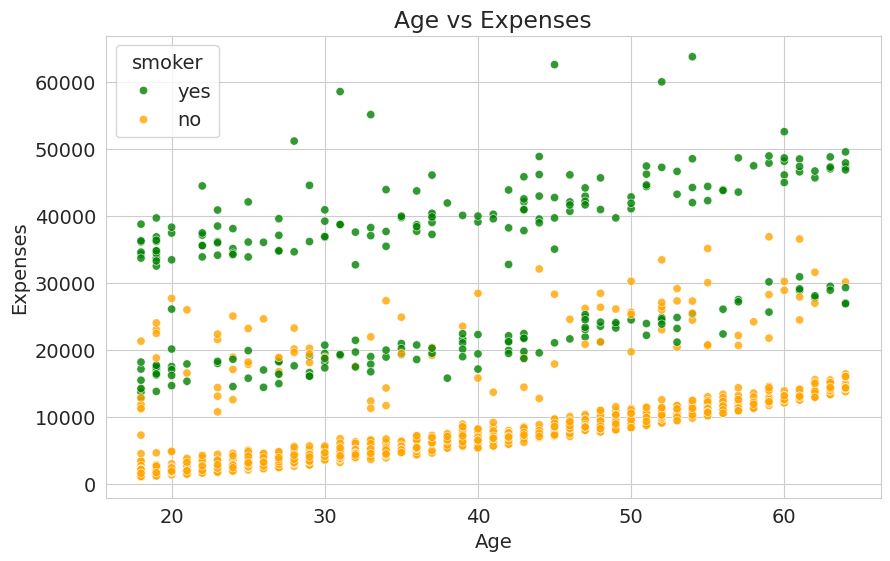

In [61]:
# Set the style and custom colors
sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="expenses", hue="smoker", palette=["green", "orange"], alpha=0.8)
plt.title("Age vs Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")

# Show the plot
plt.show()


### ***BMI & Expenses***

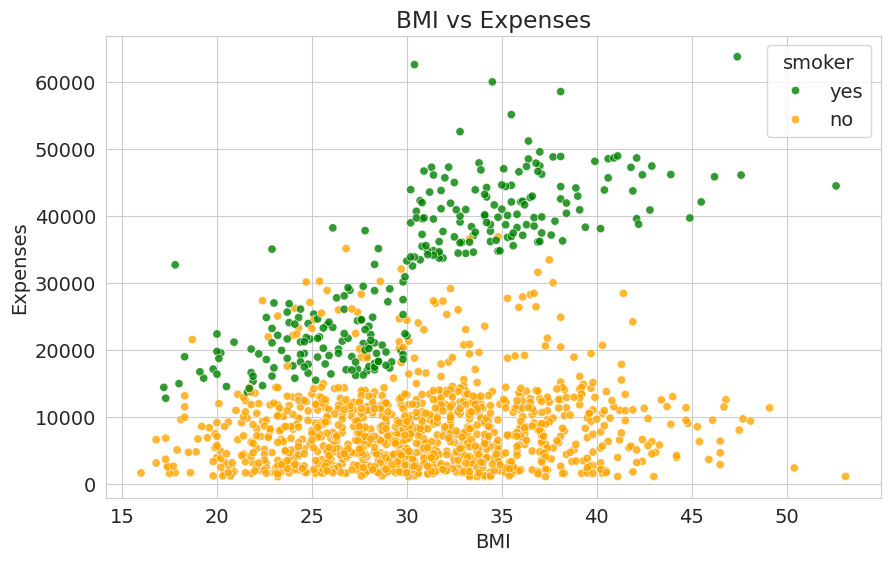

In [62]:
# Set the style and custom colors
sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bmi", y="expenses", hue="smoker", palette=["green", "orange"], alpha=0.8)
plt.title("BMI vs Expenses")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


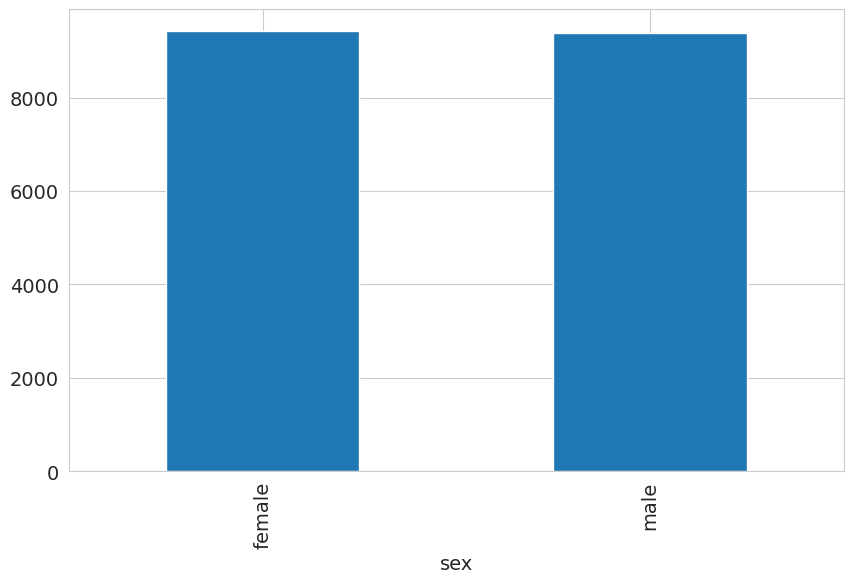

In [63]:
df.groupby("sex")['expenses'].median().plot.bar()
plt.show()

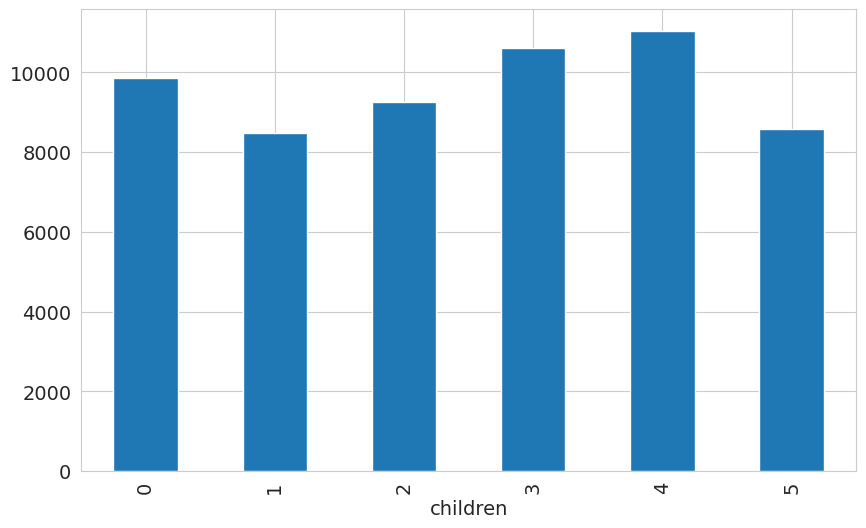

In [64]:
df.groupby("children")['expenses'].median().plot.bar()
plt.show()

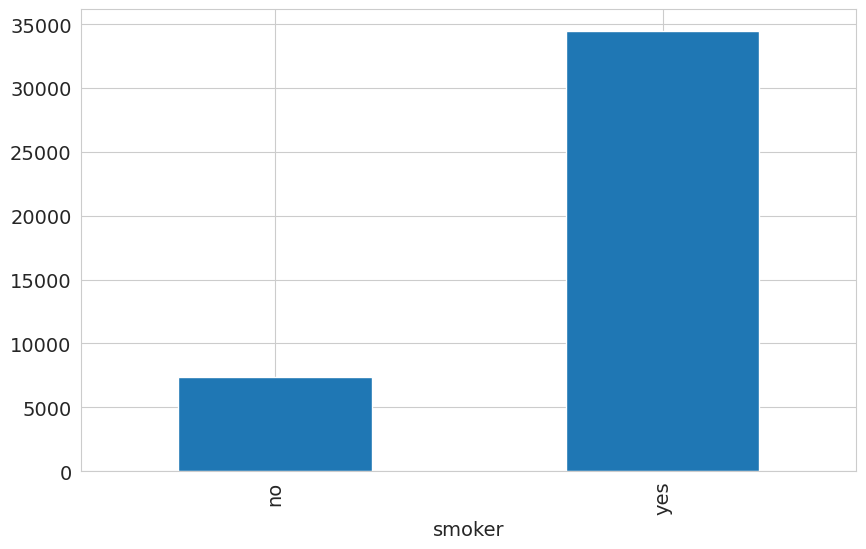

In [65]:
df.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

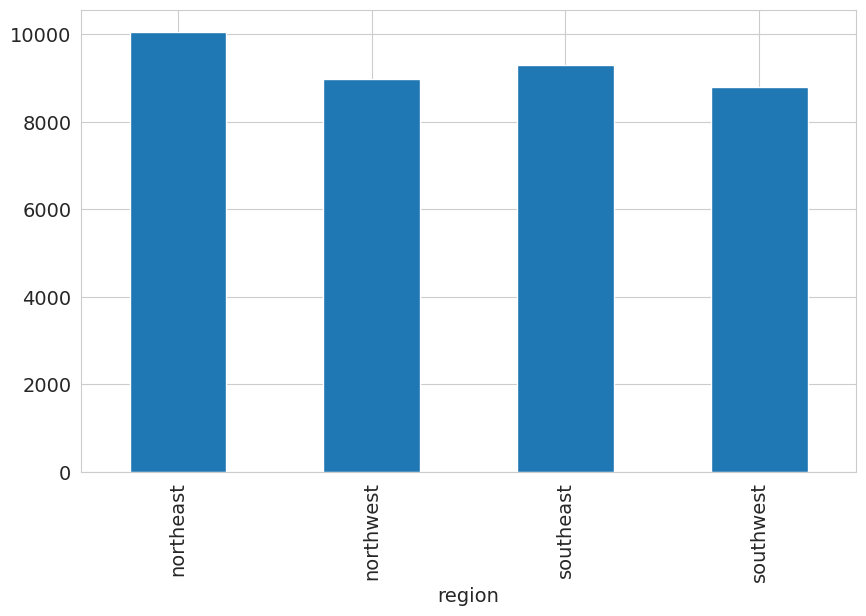

In [66]:
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

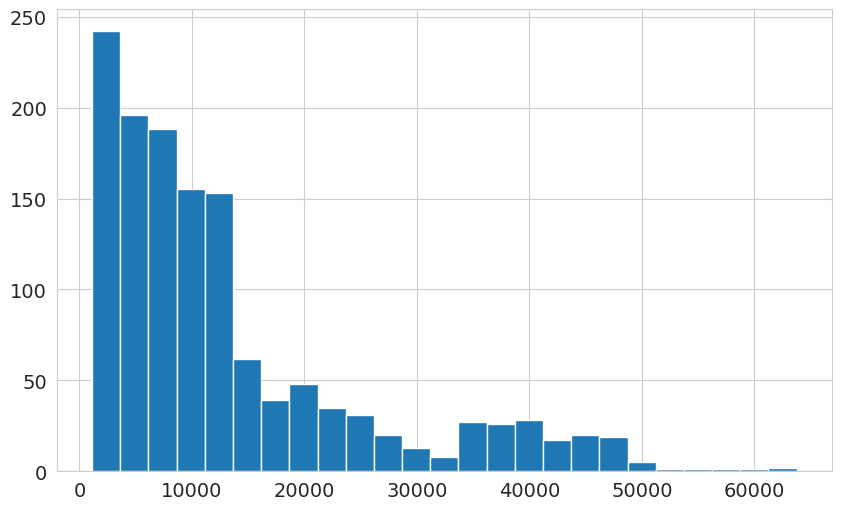

In [67]:
df['expenses'].hist(bins=25)
plt.show()

<Figure size 1000x600 with 0 Axes>

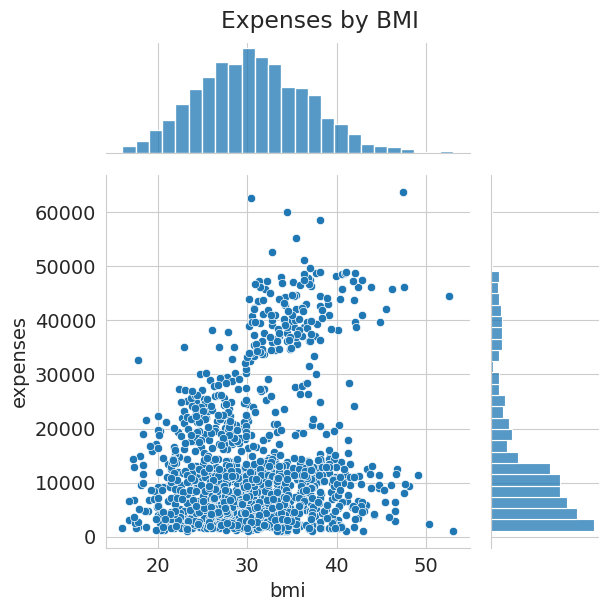

In [68]:

# Set the style
sns.set_style("whitegrid")

# Create a joint plot using Seaborn
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='bmi', y='expenses', kind='scatter', height=6, ratio=3)
plt.suptitle('Expenses by BMI', y=1.02)

# Show the plot
plt.show()


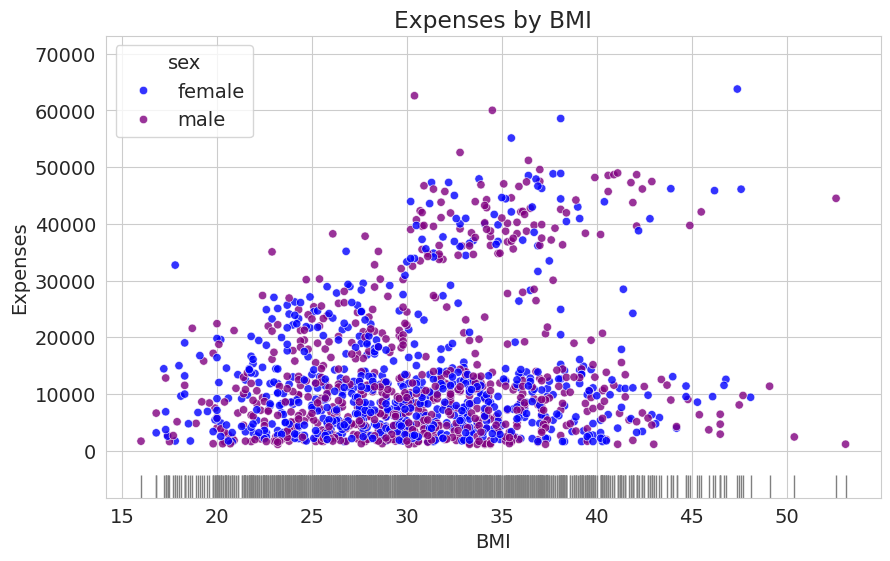

In [69]:

# Set the style
sns.set_style("whitegrid")

# Create a scatter plot with rug plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bmi", y="expenses", hue="sex", palette=["blue", "purple"], alpha=0.8)
sns.rugplot(data=df, x="bmi", color="gray", height=0.05)
plt.title("Expenses by BMI")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


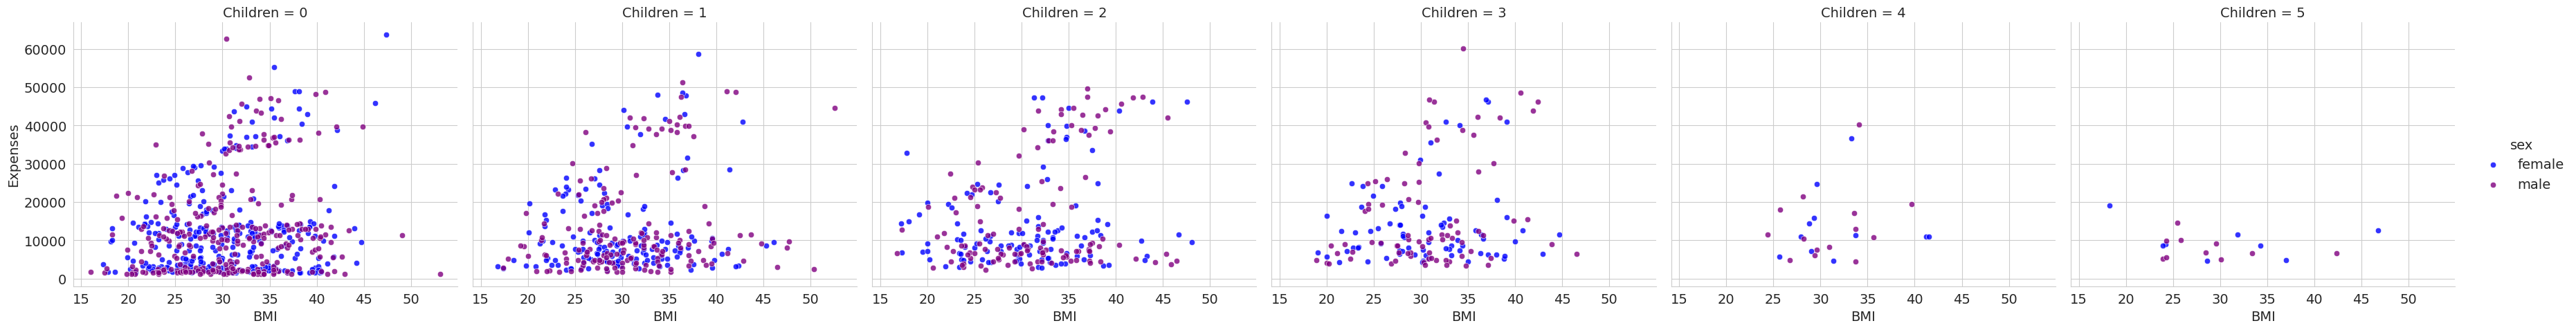

In [70]:

# Set the style and custom colors
sns.set_style("whitegrid")

# Create the facetted scatter plot using Seaborn
g = sns.FacetGrid(df, col="children", hue="sex", palette=["blue", "purple"], height=5, aspect=1.2)
g.map(sns.scatterplot, "bmi", "expenses", alpha=0.8)
g.set_titles("Children = {col_name}")
g.set_xlabels("BMI")
g.set_ylabels("Expenses")
g.add_legend()

# Show the plot
plt.show()


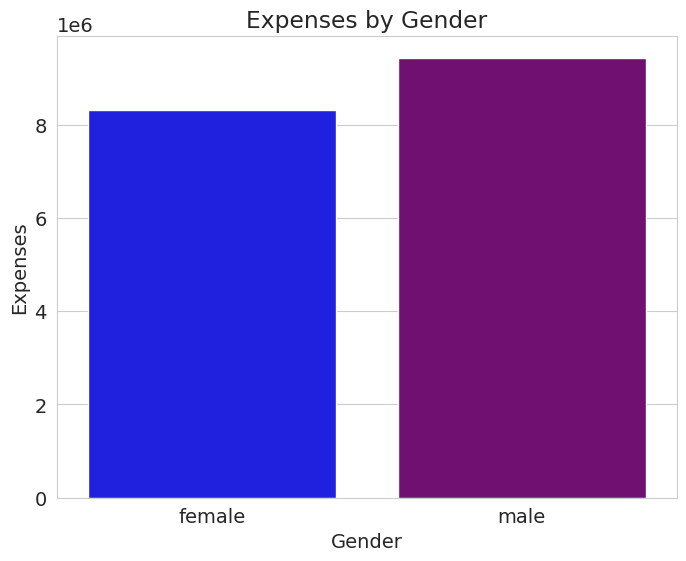

In [71]:

# Calculate total expenses by gender
expenses_by_gender = df.groupby('sex')['expenses'].sum().reset_index()

# Set the style
sns.set_style("whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=expenses_by_gender, x='sex', y='expenses', palette=['blue', 'purple'])
plt.title('Expenses by Gender')
plt.xlabel('Gender')
plt.ylabel('Expenses')

# Show the plot
plt.show()


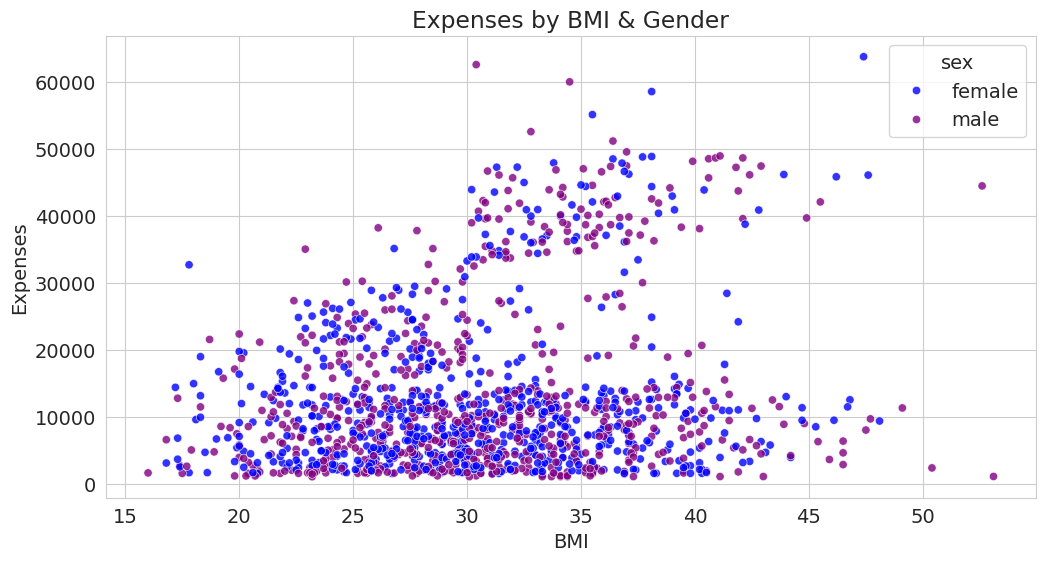

In [72]:

# Set the style and custom colors
sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="bmi", y="expenses", hue="sex", palette=["blue", "purple"], alpha=0.8)
plt.title("Expenses by BMI & Gender")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


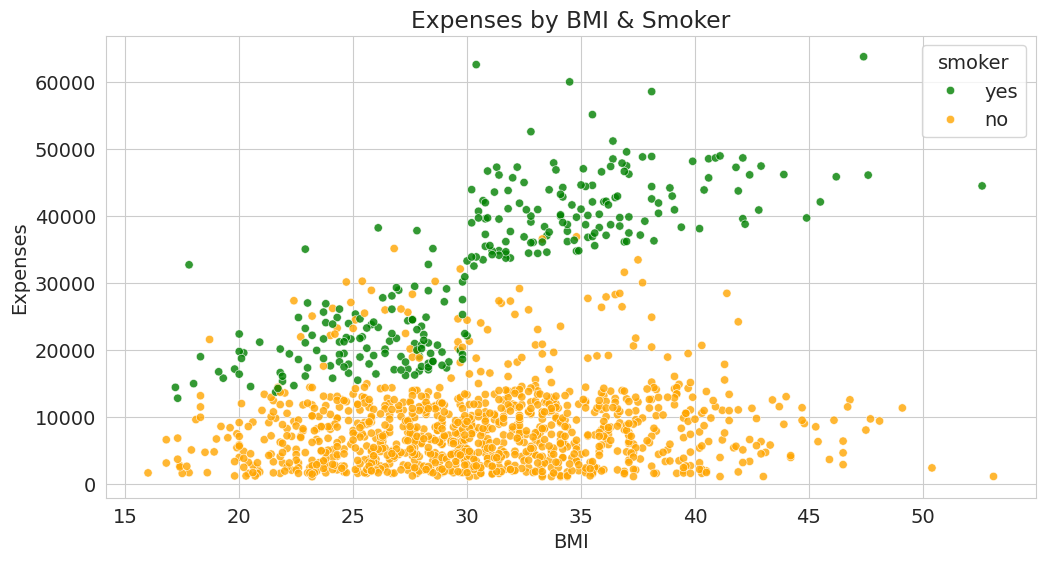

In [73]:

# Set the style and custom colors
sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="bmi", y="expenses", hue="smoker", palette=["green", "orange"], alpha=0.8)
plt.title("Expenses by BMI & Smoker")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


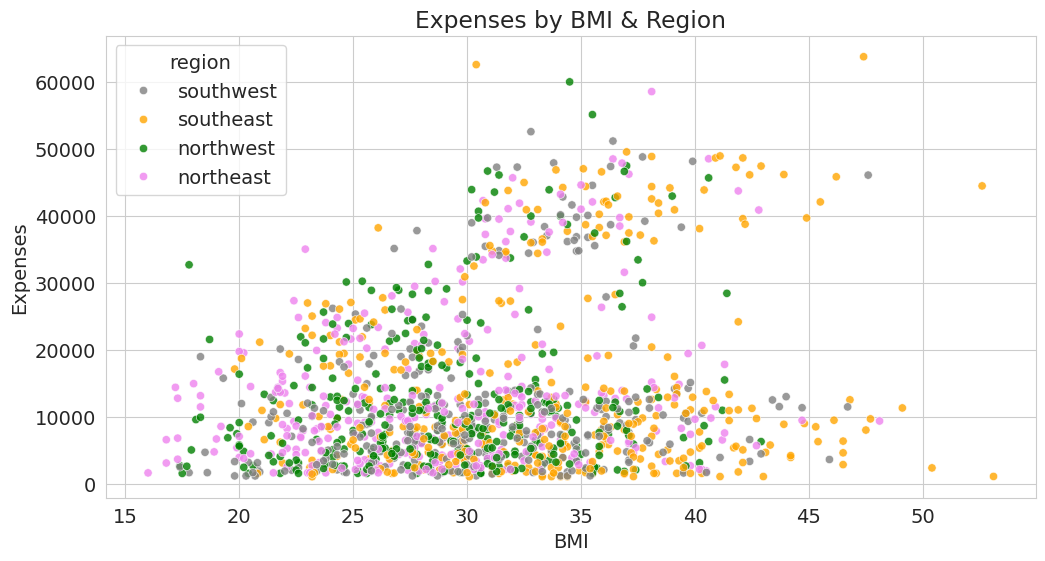

In [74]:

sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="bmi", y="expenses", hue="region", palette=["grey", "orange", "green", "violet"], alpha=0.8)
plt.title("Expenses by BMI & Region")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


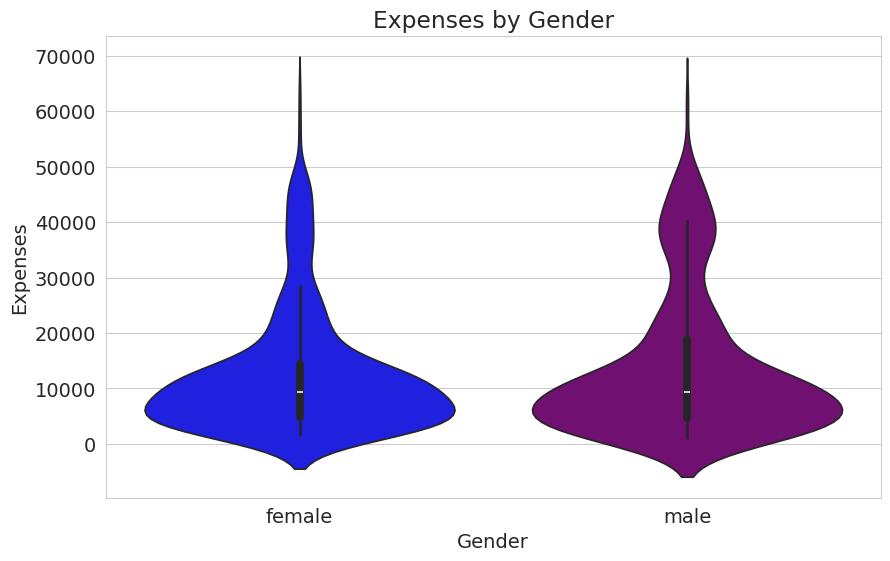

In [75]:
sns.set_style("whitegrid")

# Create the violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="sex", y="expenses", palette=["blue", "purple"])
plt.title("Expenses by Gender")
plt.xlabel("Gender")
plt.ylabel("Expenses")

# Show the plot
plt.show()


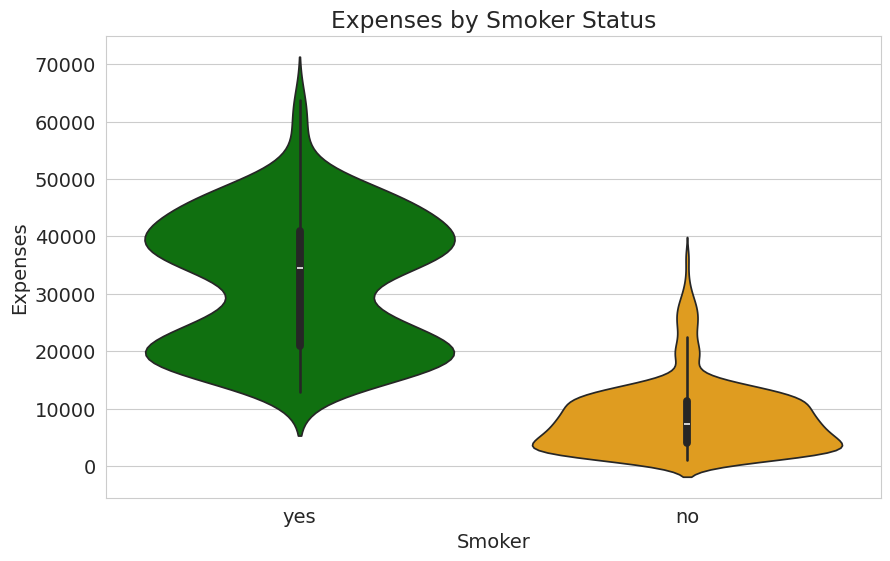

In [76]:

sns.set_style("whitegrid")

# Create the violin plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="smoker", y="expenses", palette=["green", "orange"])
plt.title("Expenses by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Expenses")

# Show the plot
plt.show()


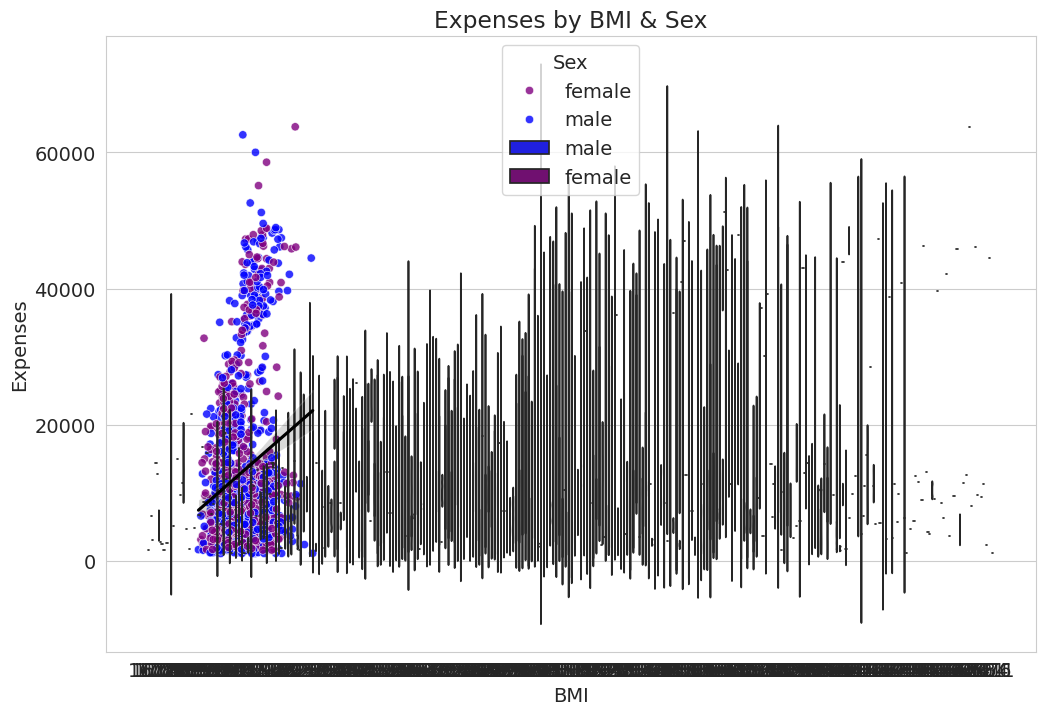

In [77]:

sns.set_style("whitegrid")
colors = {"male": "blue", "female": "purple"}

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="bmi", y="expenses", hue="sex", palette=colors, alpha=0.8)

# Add marginal violin plots
sns.violinplot(data=df, x="bmi", y="expenses", hue="sex", palette=colors, split=True, inner="quart", bw=0.15)

# Add a trendline using linear regression
sns.regplot(data=df, x="bmi", y="expenses", scatter=False, color="black", line_kws={"label": "Trendline"})

# Set the legend and labels
plt.legend(title="Sex")
plt.title("Expenses by BMI & Sex")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


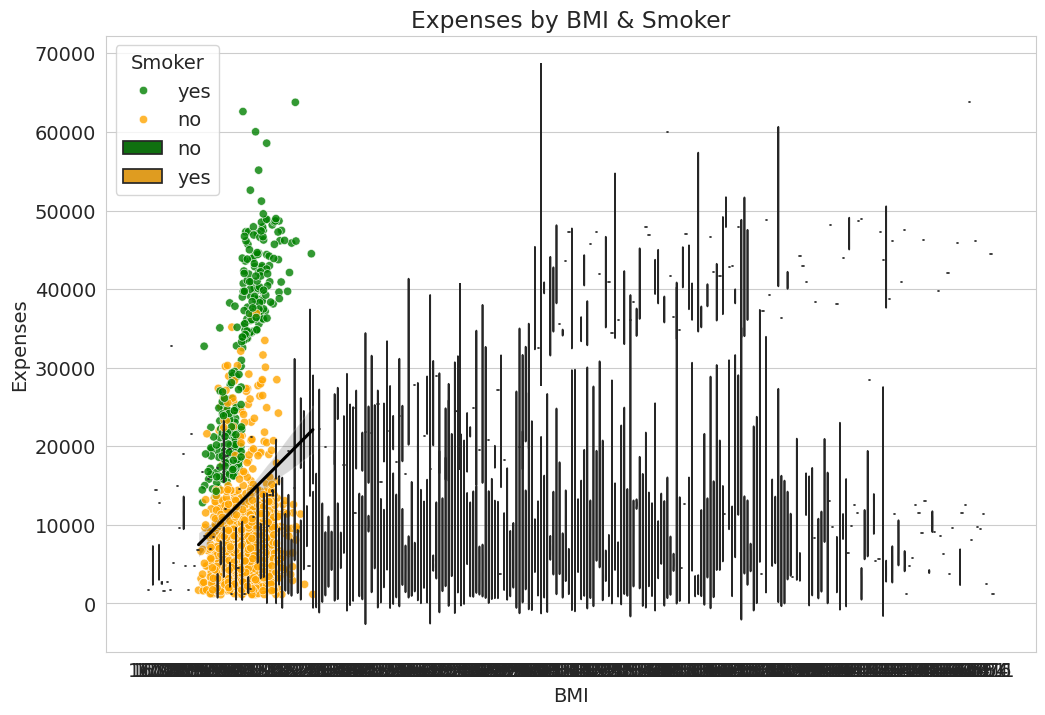

In [78]:

sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x="bmi", y="expenses", hue="smoker", palette=["green", "orange"], alpha=0.8)

# Add marginal violin plots
sns.violinplot(data=df, y="expenses", x="bmi", hue="smoker", palette=["green", "orange"], split=True, inner="quart", bw=0.15, ax=scatter)

# Add a trendline using linear regression
sns.regplot(data=df, x="bmi", y="expenses", scatter=False, color="black", line_kws={"label": "Trendline"})

# Set the legend and labels
plt.legend(title="Smoker")
plt.title("Expenses by BMI & Smoker")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


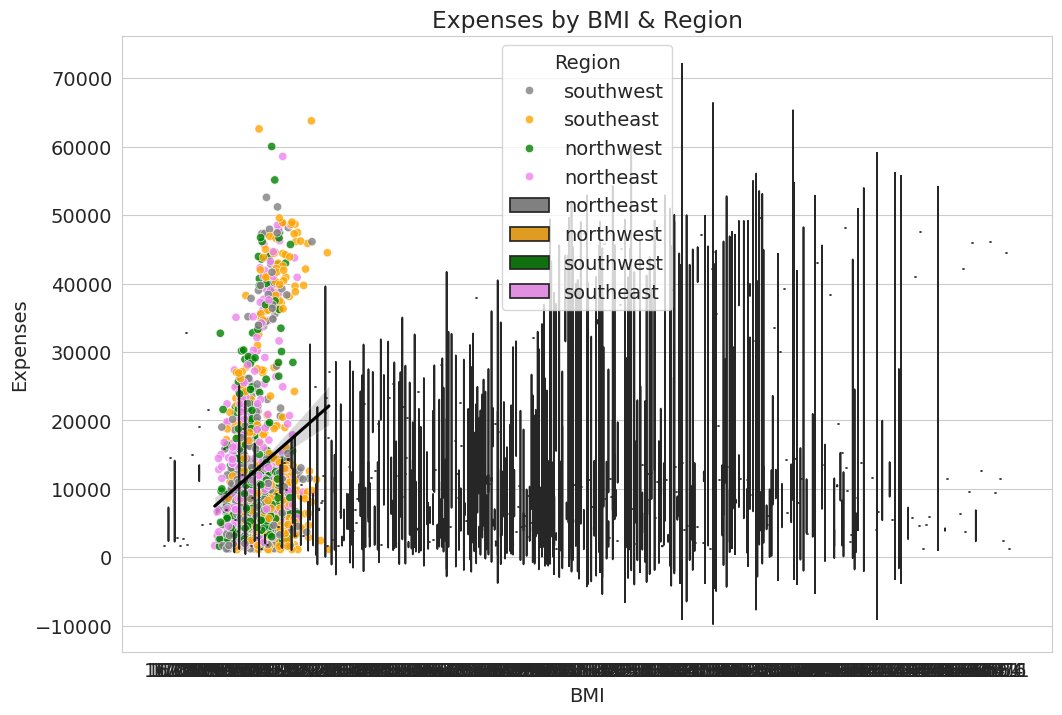

In [79]:

sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x="bmi", y="expenses", hue="region", palette=["grey", "orange", "green", "violet"], alpha=0.8)

# Add marginal violin plots
sns.violinplot(data=df, y="expenses", x="bmi", hue="region", palette=["grey", "orange", "green", "violet"], split=True, inner="quart", bw=0.15, ax=scatter)

# Add a trendline using linear regression
sns.regplot(data=df, x="bmi", y="expenses", scatter=False, color="black", line_kws={"label": "Trendline"})

# Set the legend and labels
plt.legend(title="Region")
plt.title("Expenses by BMI & Region")
plt.xlabel("BMI")
plt.ylabel("Expenses")

# Show the plot
plt.show()


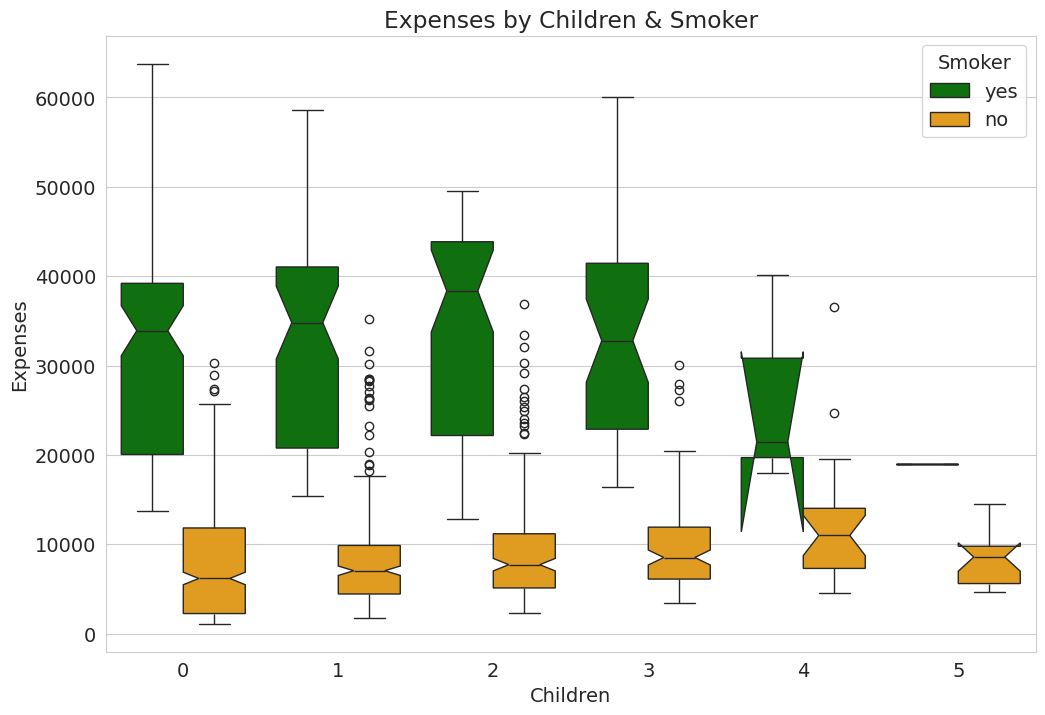

In [80]:

sns.set_style("whitegrid")

# Create the box plot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="children", y="expenses", hue="smoker", palette=["green", "orange"], notch=True)
plt.title("Expenses by Children & Smoker")
plt.xlabel("Children")
plt.ylabel("Expenses")

# Set the legend
plt.legend(title="Smoker")

# Show the plot
plt.show()


### ***Correlation***

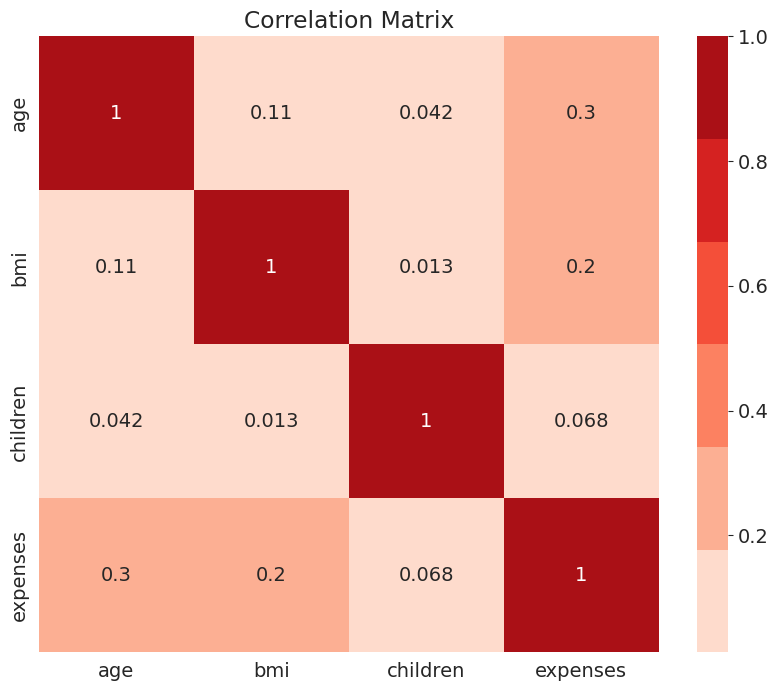

In [82]:

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Set the style and custom color map
sns.set_style("whitegrid")
cmap = sns.color_palette("Reds")

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap=cmap, annot=True)
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [83]:
df.expenses.corr(df.age)

0.2990081922850828

In [84]:
df.expenses.corr(df.bmi)

0.19857625501893206

In [85]:
smoker_values = {'no': 0,'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.expenses.corr(smoker_numeric)

0.7872514298985541

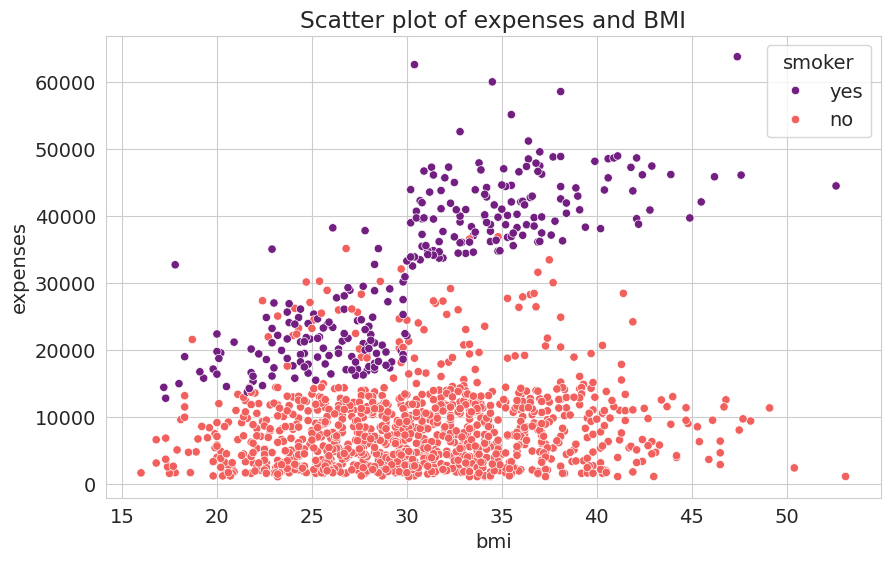

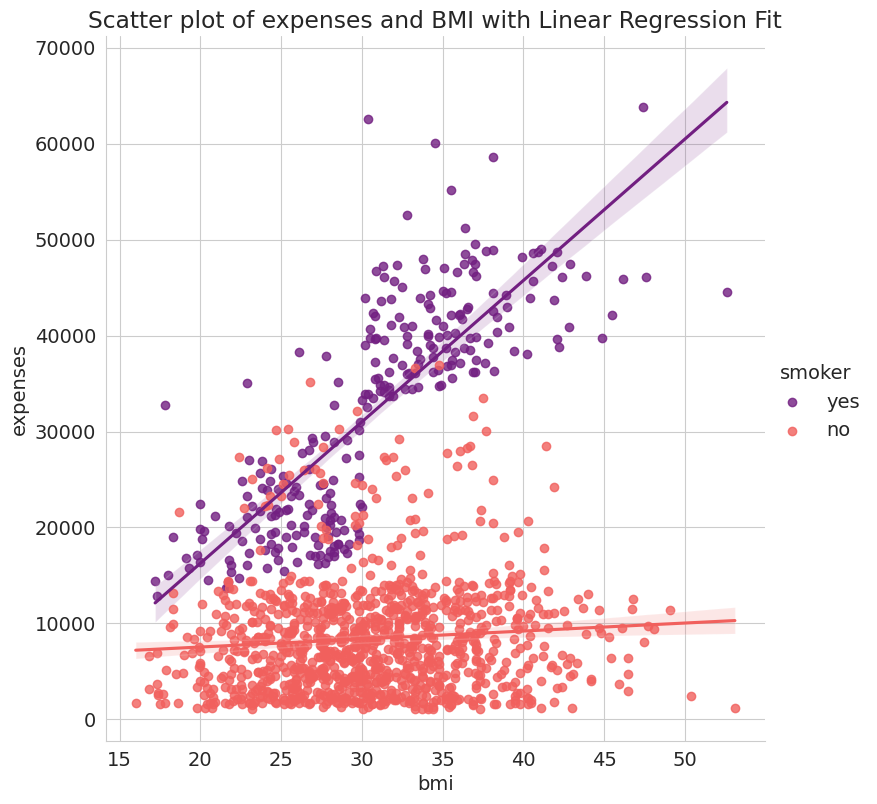

In [86]:

sns.set_style("whitegrid")

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='expenses', palette='magma', hue='smoker')
plt.title('Scatter plot of expenses and BMI')

# Create the lmplot for linear regression fit
sns.lmplot(data=df, x="bmi", y="expenses", hue="smoker", palette='magma', height=8)
plt.title('Scatter plot of expenses and BMI with Linear Regression Fit')

# Show the plots
plt.show()


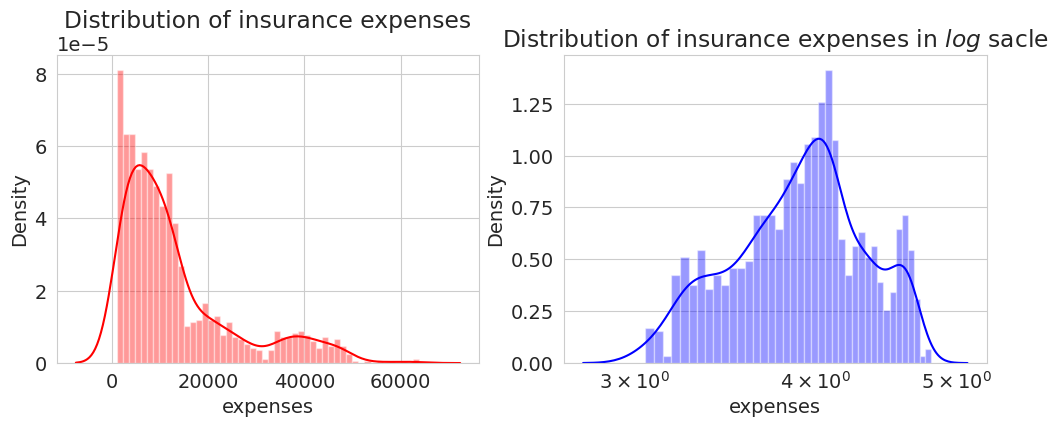

In [87]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['expenses'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['expenses']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');

In [88]:
X = df.drop(['expenses'], axis=1)
y = df['expenses']

In [89]:
# saving the cleaned data
X.to_csv('clean_data.csv')

### ***Standard Scalar***

#### ***One-hot Encoding***

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numerical and categorical features
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create a preprocessor that applies transformers to the respective feature groups
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Example usage of the preprocessor:
# transformed_data = preprocessor.fit_transform(data)


In [ ]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(1070, 6) (268,)


#### ***Loss/Cost Function***